rectangle no.  3 relatively changed by  0.1347 
rectangle no. 34 relatively changed by  0.1095 
rectangle no. 32 relatively changed by  0.1064 


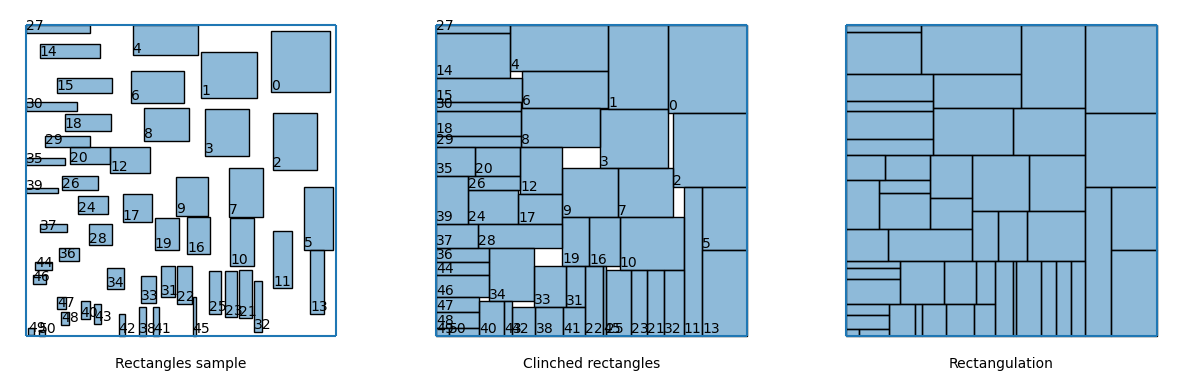

In [3]:
import numpy as np
from SquareDivision.src.rectangle_class import Rectangulation
from SquareDivision.src.distributions import FromFunction, BetweenFunctions, tepui, surface_perp_to

rects = Rectangulation(config={"seed": 123567})


width_0 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([0, -1, 5]), val_at_0 = 0.0075)
width_1 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([0, -2, 10]), val_at_0 = 0.02)
# width_1 = lambda mid_pt: tepui(mid_pt, top=0.6, bottom=0.01, slope=2.5, vertex=0.8, pts=np.array([[0.5, 0.5]]))

height_0 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([-1, 0, 5]), val_at_0 = 0.0075)
height_1 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([-2, 0, 10]), val_at_0 = 0.02)
# height_1 = lambda mid_pt: tepui(mid_pt, top=0.5, bottom=0.01, slope=2.5, vertex=0.8, pts=np.array([[0.5, 0.5]]))

rects.sample_rectangles(
    num=200, 
    widths_strategy = BetweenFunctions(func_0=width_0, func_1=width_1, rng=rects.rng), 
    heights_strategy= BetweenFunctions(func_0=height_0, func_1=height_1, rng=rects.rng), 
)
rects.find_disjoint_family()
rects.clinch()
rects.close_holes()

rects.report(tol=0.01, digits=4, limit_list=3)
rects.draw(disjoint=True, inflated=True, inflated_nums=True, closed=True, closed_nums=False)

### graph f : (0, 1)^2 -> R

In [ ]:
import numpy as np
from SquareDivision.src.distributions import surface_perp_to, tepui
from SquareDivision.draw.draw import draw_func
surface_perp_to_kwargs = {'vect' : np.array([0, -1, 5]), 'val_at_0' : 0.005}
tepui_kwargs = {
    'top' : 0.4, 
    'bottom' : 0.1, 
    'slope' : 3, 
    'vertex' : 0.7, 
    'pts' : np.array([[0.5, 0.5]])
    }
draw_func(surface_perp_to, func_kwargs = surface_perp_to_kwargs )
draw_func(tepui, func_kwargs = tepui_kwargs )

In [14]:
from SquareDivision.morph.inflate_strategy import MaxHomThenMaxPushFromOrder
strategy = MaxHomThenMaxPushFromOrder()
# rects.disjoint = strategy.inflate(rects.disjoint)
rects.draw(disjoint=True, inflated=True, inflated_nums=True, closed=True, closed_nums=False)

In [ ]:
rects.draw_contact_graph(1)

In [12]:
from SquareDivision.contact_graph.incidence_matrix import idxs_of_touching_rectangles_in_dir
idxs_of_touching_rectangles_in_dir(6, rects.clinched_rectangles, 'd')

array([ 4,  8, 14], dtype=int64)